In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

In [182]:
df = pd.read_csv("creditcard.csv")

### **Exploring the credit card dataset**

In [183]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [184]:
df.head().append(df.tail())

<ipython-input-184-c08175bef99c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head().append(df.tail())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [185]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [186]:
df.shape

(284807, 31)

In [229]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Note:** Naturally the fraud transcations are outliers in this task.

In [187]:
# In order to determine the number of fraud cases in our dataset , we will have to find valid(real) and fraud(fake) Transactions records from our dataset
valid = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
outlierFraction = len(fraud)/float(len(valid))
print("Outliers Fraction: ",outlierFraction)
print("Fraud Cases: ",(len(df[df['Class'] == 1])))
print("Valid Transactions: ",(len(df[df['Class'] == 0])))

Outliers Fraction:  0.0017304750013189597
Fraud Cases:  492
Valid Transactions:  284315


In [188]:
print(f"Shape of Fraud transactions: {fraud.shape}")
print(f"Shape of Non-Fraud transactions: {valid.shape}")

Shape of Fraud transactions: (492, 31)
Shape of Non-Fraud transactions: (284315, 31)


In [189]:
print("The amount of details for valid transactions:\n")
valid.Amount.describe()

The amount of details for valid transactions:



count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [190]:
print("The Amount of details for fraud transactions:\n")
fraud.Amount.describe()

The Amount of details for fraud transactions:



count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [191]:
pd.concat([valid.Amount.describe(),fraud.Amount.describe()],axis= 1)

,Amount,Amount
count,284315.000000,492.000000
mean,88.291022,122.211321
std,250.105092,256.683288
min,0.000000,0.000000
25%,5.650000,1.000000
50%,22.000000,9.250000
75%,77.050000,105.890000
max,25691.160000,2125.870000


In [192]:
valid.Time.describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [193]:
fraud.Time.describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [194]:
pd.concat([valid.Time.describe(),fraud.Time.describe()], axis=1)

,Time,Time
count,284315.000000,492.000000
mean,94838.202258,80746.806911
std,47484.015786,47835.365138
min,0.000000,406.000000
25%,54230.000000,41241.500000
50%,84711.000000,75568.500000
75%,139333.000000,128483.000000
max,172792.000000,170348.000000


### **Checking for missing or null or NaN values**

In [195]:
df.isnull().values.any()

False

In [196]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [197]:
df.isnull().sum().sum()

0

In [198]:
# once again checking for null or NaN values
print("Non-missing values: " + str(df.isnull().shape[0]))
print("Missing values: " + str(df.shape[0] - df.isnull().shape[0]))

Non-missing values: 284807
Missing values: 0


Since, we have no missing values then no need to deal with null values, we can continue.

### **Visualizations**

<ipython-input-199-7171347071e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], color='red');
<ipython-input-199-7171347071e2>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'],color='red');


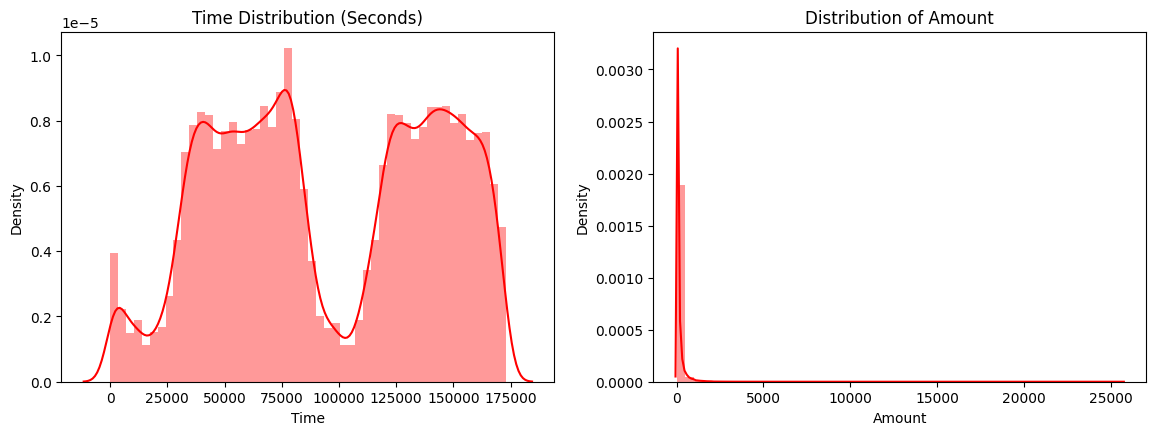

In [199]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='red');

# plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='red');

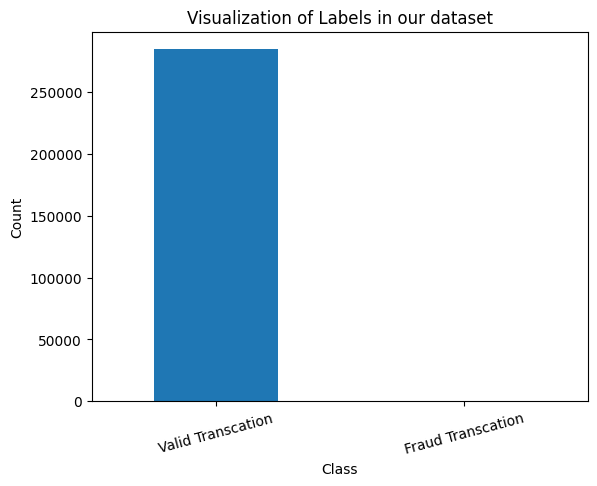

In [200]:
labels = ["Valid Transcation", "Fraud Transcation"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 15)
plt.title("Visualization of Labels in our dataset")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

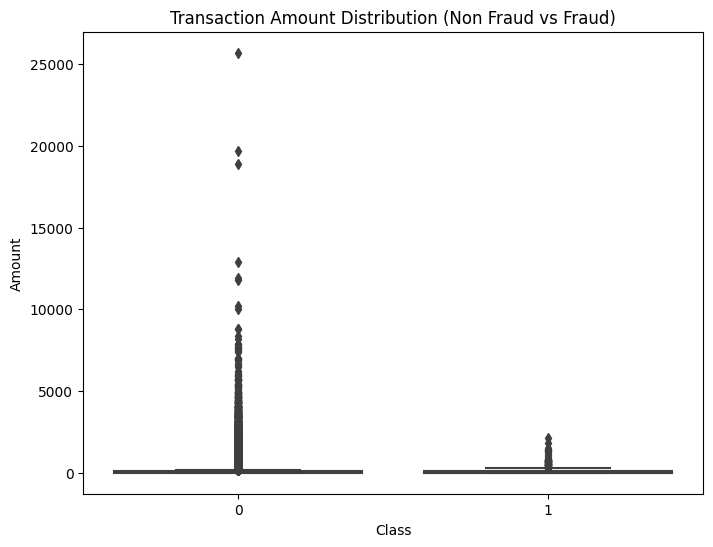

In [201]:
# Create a boxplot for "Amount" grouped by the "Class" column
plt.figure(figsize=(8, 6))
sns.boxplot(x="Class", y="Amount", data=df)
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title("Transaction Amount Distribution (Non Fraud vs Fraud)")
plt.show()

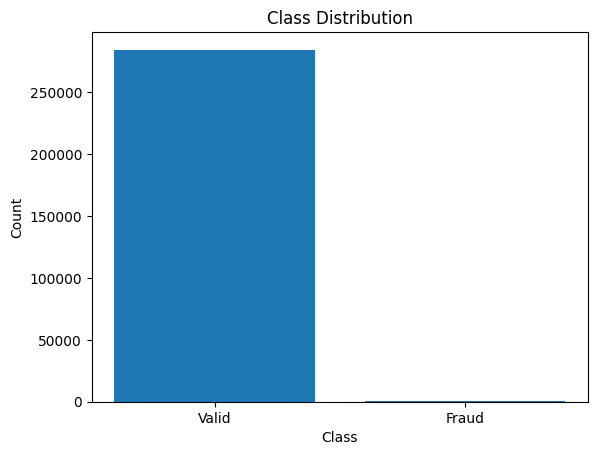

In [202]:
# Count the number of fraud and valid transactions

class_counts = df["Class"].value_counts()

# Create a bar chart for class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks([0, 1], ["Valid", "Fraud"])
plt.show()

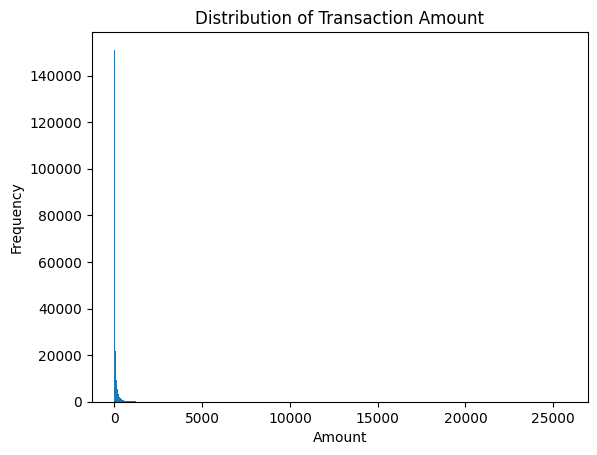

In [203]:
# Plot histogram for "Amount"
plt.hist(df["Amount"], bins=1000)
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amount")
plt.show()

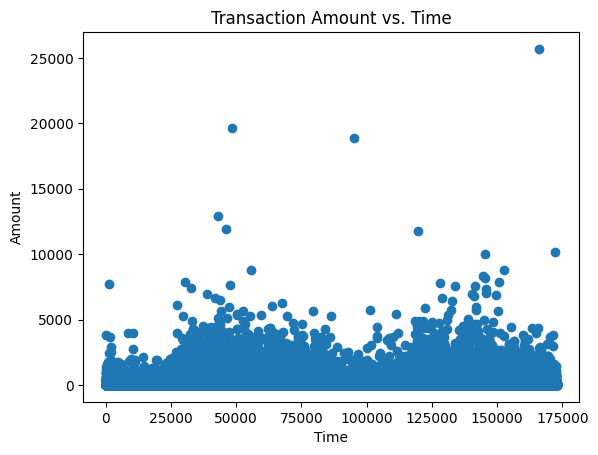

In [204]:
# Create a scatter plot for "Amount" and "Time"
plt.scatter(df["Time"], df["Amount"])
plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("Transaction Amount vs. Time")
plt.show()

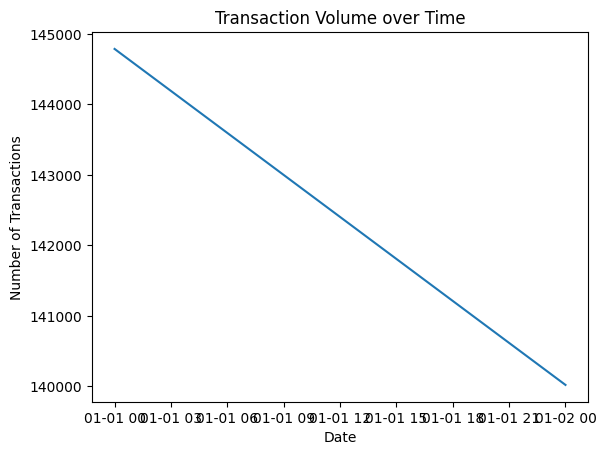

In [205]:
# Convert the "Time" column to datetime format
df["Time(seconds)"] = pd.to_datetime(df["Time"], unit="s")

# Group the data by day and count the number of transactions
daily_transactions = df.groupby(df["Time(seconds)"].dt.date)["Amount"].count()

# Plot the time series
plt.plot(daily_transactions.index, daily_transactions.values)
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Transaction Volume over Time")
plt.show()

In [206]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time(seconds)
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1970-01-01 00:00:00
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1970-01-01 00:00:00
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1970-01-01 00:00:01
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1970-01-01 00:00:01
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1970-01-01 00:00:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1970-01-02 23:59:46
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1970-01-02 23:59:47
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1970-01-02 23:59:48
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1970-01-02 23:59:48


In [207]:
df.drop(columns=["Time(seconds)"] , inplace = True)

In [224]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


##### **HeatMap Plot**

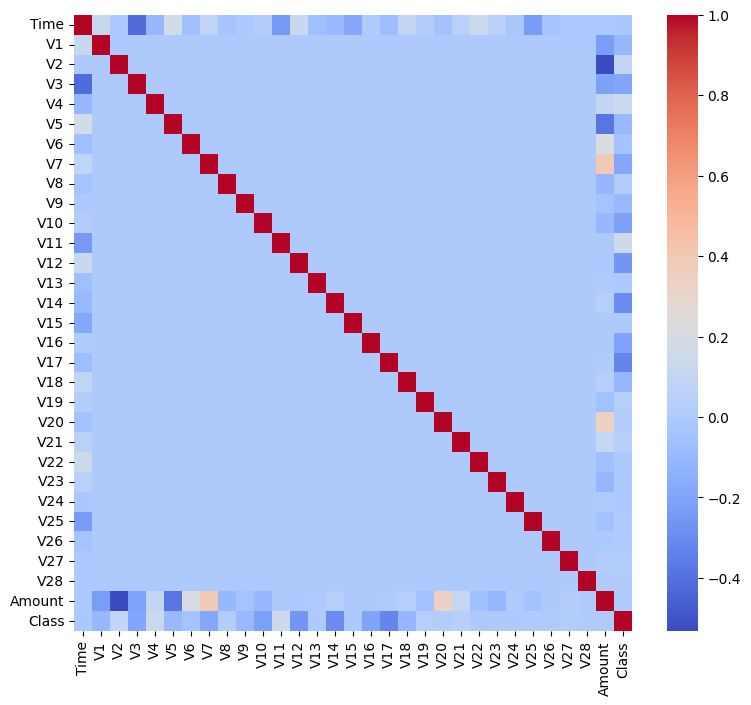

In [208]:
# Correlation matrix
plt.figure(figsize=(9,8))
sns.heatmap(data=df.corr() , cmap='coolwarm')
plt.show()

### **Prediction using Machine Learning model known Random Forest Classifer**

In [209]:
X = df.drop('Class', axis=1)
y = df['Class']

In [210]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
yPred = rfc.predict(X_test) # for our predictions

In [213]:
accuracy = accuracy_score(y_test, yPred) * 100
print("Accuracy of Random Forest Classifier Model:", accuracy)

Accuracy of Random Forest Classifier Model: 99.95786664794073


In [214]:
confusion_mat = confusion_matrix(y_test, yPred)
print("The confusion marix is as follows:\n\n")
print("Confusion Matrix\n")
print(confusion_mat)

The confusion marix is as follows:


Confusion Matrix

[[56863     1]
 [   23    75]]


#### **Evaluating Model's Performance**

In [215]:
print("On Random Forest Classifier Model\n We have:-")

# Precision
precision = [precision_score(y_test, yPred, pos_label=1)*(100)]
print('\n Score Precision :\n',precision,"%")


# Recall
# Recall's formula is-----> TP / (TP + FN)
recall = [recall_score(y_test, yPred, pos_label=1)*(100)]
print("\n Recall Score :\n", recall,"%")


# F1 Score
fscore = [f1_score(y_test, yPred, pos_label=1)*(100)]
print("\n F1 Score :\n", fscore,"%")


# Matthews correlation coefficient
MCC = [matthews_corrcoef(y_test, yPred)*(100)]
print("\n Matthews correlation coefficient:\n",MCC,"%")

On Random Forest Classifier Model
 We have:-

 Score Precision :
 [98.68421052631578] %

 Recall Score :
 [76.53061224489795] %

 F1 Score :
 [86.20689655172413] %

 Matthews correlation coefficient:
 [86.88552993136149] %


In [216]:
print("The model here used, is Random Forest classifier:")
print("\n")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model here used, is Random Forest classifier:


The accuracy is 0.9995786664794073
The precision is 0.9868421052631579
The recall is 0.7653061224489796
The F1-Score is 0.8620689655172413
The Matthews correlation coefficient is 0.8688552993136148


In [217]:
print(yPred != y_test)

43428     False
49906     False
29474     False
276481    False
278846    False
          ...  
75723     False
252263    False
221246    False
81910     False
59490     False
Name: Class, Length: 56962, dtype: bool


In [218]:
n_outliers = len(fraud)
n_errors = (yPred != y_test).sum()

In [219]:
print("The number of outliers are",n_outliers)
print("\n")
print("The number of errors are",n_errors)

The number of outliers are 492


The number of errors are 24


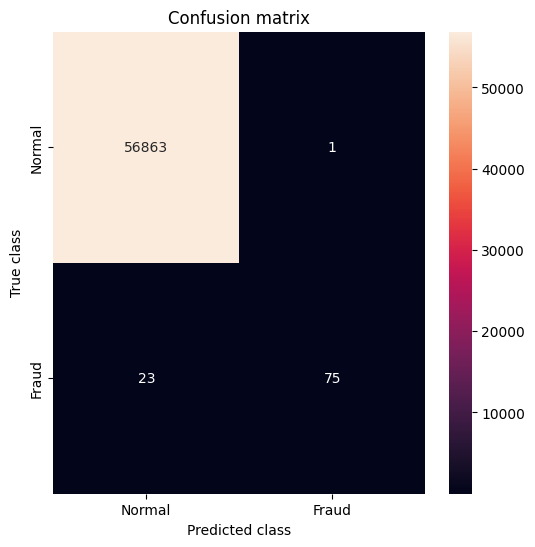

In [220]:
# ploting the confusion matrix
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="n");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [222]:
report = classification_report(y_test, yPred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



#### **Checking with Unseen Data**

In [230]:
unseen_dataframe = pd.read_csv("CreditCardUnseen.csv")

In [231]:
predictions = rfc.predict(unseen_dataframe.drop('Class', axis=1))

In [232]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [233]:
print(len(predictions))

19


*Finally, we can say that our random forest classifier-driven credit card fraud detection system has a lot of promise for protecting transactions from fraud or from thefts.*